# Import necessary libraries and modules


In [66]:
import os
import optuna
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Function to plot training history
def plot_training(hist):
    # Extract accuracy and loss values for both training and validation sets
    accuracy = hist.history["accuracy"]
    loss = hist.history["loss"]
    val_accuracy = hist.history["val_accuracy"]
    val_loss = hist.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    # Find epochs with the highest validation accuracy and the lowest validation loss
    best_acc_epoch = np.argmax(val_accuracy) + 1
    best_loss_epoch = np.argmin(val_loss) + 1

    # Plot settings
    plt.figure(figsize=(20, 8))
    plt.style.use("fivethirtyeight")

    # Metrics to be plotted: Loss and Accuracy for training and validation sets
    metrics = [
        ("Loss", loss, val_loss, best_loss_epoch, "red", "green"),
        ("Accuracy", accuracy, val_accuracy, best_acc_epoch, "red", "green"),
    ]

    # Loop through metrics and create subplots
    for i, (
        metric_name,
        train_data,
        val_data,
        best_epoch,
        train_color,
        val_color,
    ) in enumerate(metrics, 1):
        plt.subplot(1, 2, i)
        plt.plot(epochs, train_data, label=f"Training {metric_name}", color=train_color)
        plt.plot(epochs, val_data, label=f"Validation {metric_name}", color=val_color)
        plt.scatter(
            best_epoch,
            val_data[best_epoch - 1],
            s=150,
            color="blue",
            label=f"Best Epoch: {best_epoch}",
        )
        plt.title(f"Training and Validation {metric_name}")
        plt.xlabel("Epochs")
        plt.ylabel(metric_name)
        plt.legend()

    plt.tight_layout()
    plt.show()

In [70]:
# Set directories for training, validation, and testing data
train_dir = "/kaggle/input/sports-classification/train"
val_dir = "/kaggle/input/sports-classification/valid"
test_dir = "/kaggle/input/sports-classification/test"

# Data loading and preprocessing
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    preprocessing_function=preprocess_input,
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# Create data generators from directories

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


# Model Training and Hyperparameter tuning

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


[I 2024-01-21 22:42:57,916] A new study created in memory with name: no-name-4f61615f-504e-4ec7-a924-8e5565fc1944


Epoch 1/5


2024-01-21 22:43:06.463644: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


422/422 [==============================] - 166s 376ms/step - loss: 2.0321 - accuracy: 0.5129 - val_loss: 0.5824 - val_accuracy: 0.8560
Epoch 2/5
422/422 [==============================] - 157s 372ms/step - loss: 0.9090 - accuracy: 0.7381 - val_loss: 0.3600 - val_accuracy: 0.8980
Epoch 3/5
422/422 [==============================] - 156s 369ms/step - loss: 0.7327 - accuracy: 0.7853 - val_loss: 0.3006 - val_accuracy: 0.9140
Epoch 4/5
422/422 [==============================] - 155s 366ms/step - loss: 0.6515 - accuracy: 0.8052 - val_loss: 0.2753 - val_accuracy: 0.9240
Epoch 5/5
422/422 [==============================] - 156s 370ms/step - loss: 0.6126 - accuracy: 0.8169 - val_loss: 0.2404 - val_accuracy: 0.9240


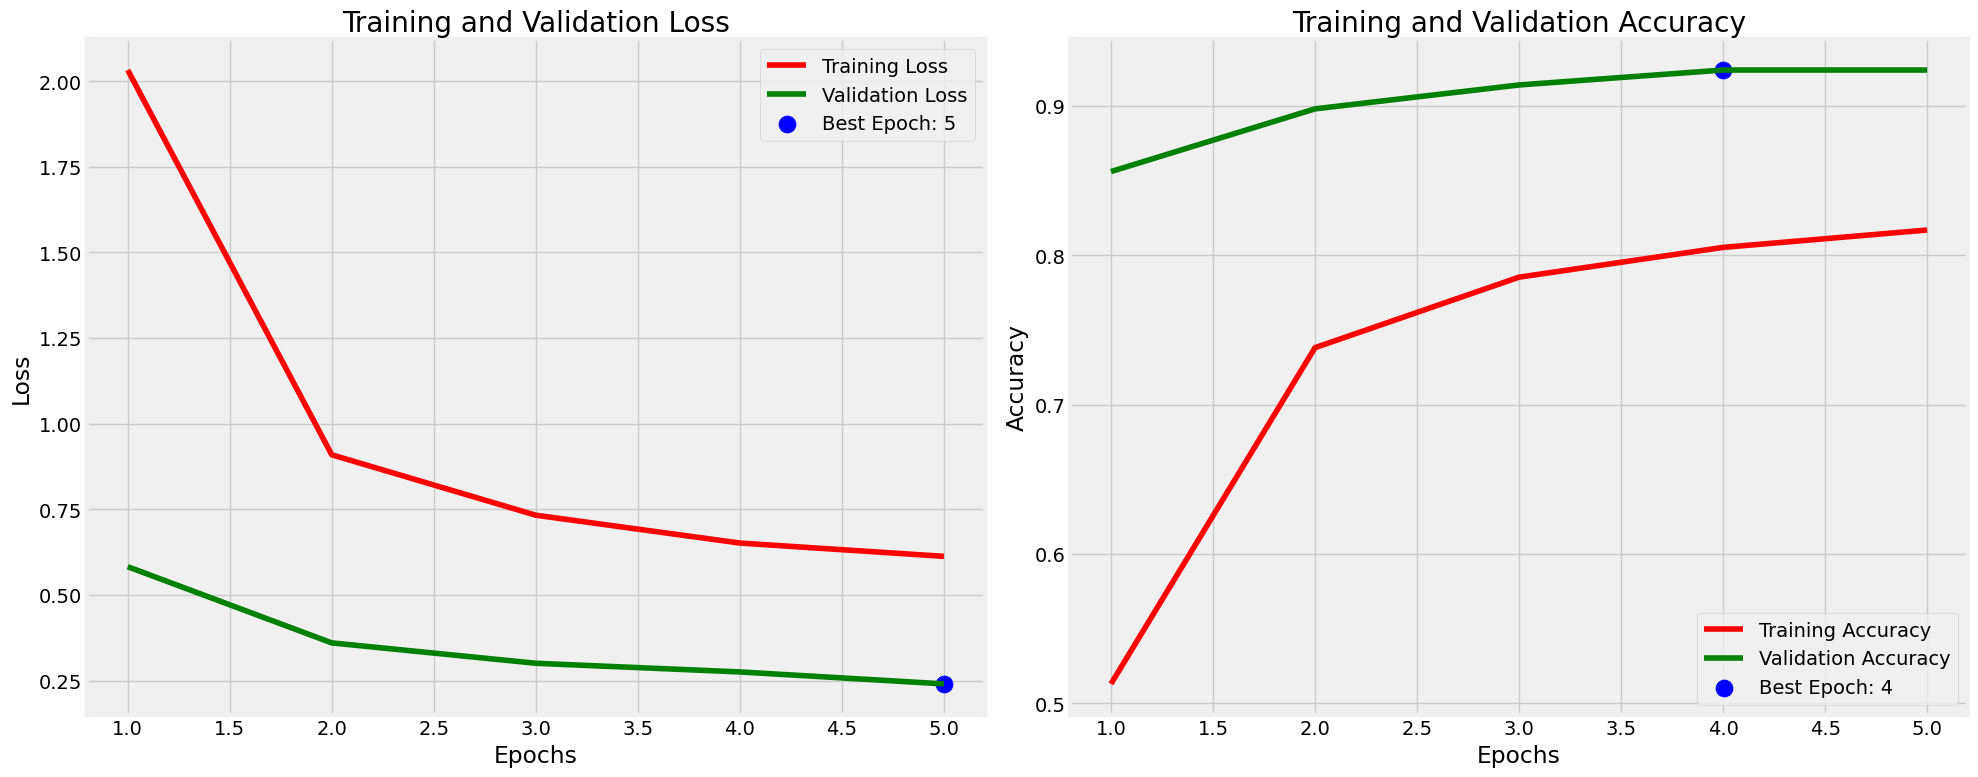

16/16 [==============================] - 1s 61ms/step - loss: 0.2404 - accuracy: 0.9240


[I 2024-01-21 22:56:11,766] Trial 0 finished with value: 0.9240000247955322 and parameters: {'dropout_rate': 0.4999302098621021, 'add_dense_layer': True, 'dense_units': 149}. Best is trial 0 with value: 0.9240000247955322.


Epoch 1/5


2024-01-21 22:56:20.263324: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


422/422 [==============================] - ETA: 0s - loss: 2.2010 - accuracy: 0.4888

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/422 [==============================] - 164s 371ms/step - loss: 2.2010 - accuracy: 0.4888 - val_loss: 0.7623 - val_accuracy: 0.8100
Epoch 2/5
422/422 [==============================] - 155s 368ms/step - loss: 0.9061 - accuracy: 0.7504 - val_loss: 0.4614 - val_accuracy: 0.8720
Epoch 3/5
422/422 [==============================] - 153s 363ms/step - loss: 0.7070 - accuracy: 0.7949 - val_loss: 0.3800 - val_accuracy: 0.8880
Epoch 4/5
422/422 [==============================] - 155s 366ms/step - loss: 0.6243 - accuracy: 0.8165 - val_loss: 0.3013 - val_accuracy: 0.9200
Epoch 5/5
422/422 [==============================] - 154s 365ms/step - loss: 0.5734 - accuracy: 0.8305 - val_loss: 0.2789 - val_accuracy: 0.9160


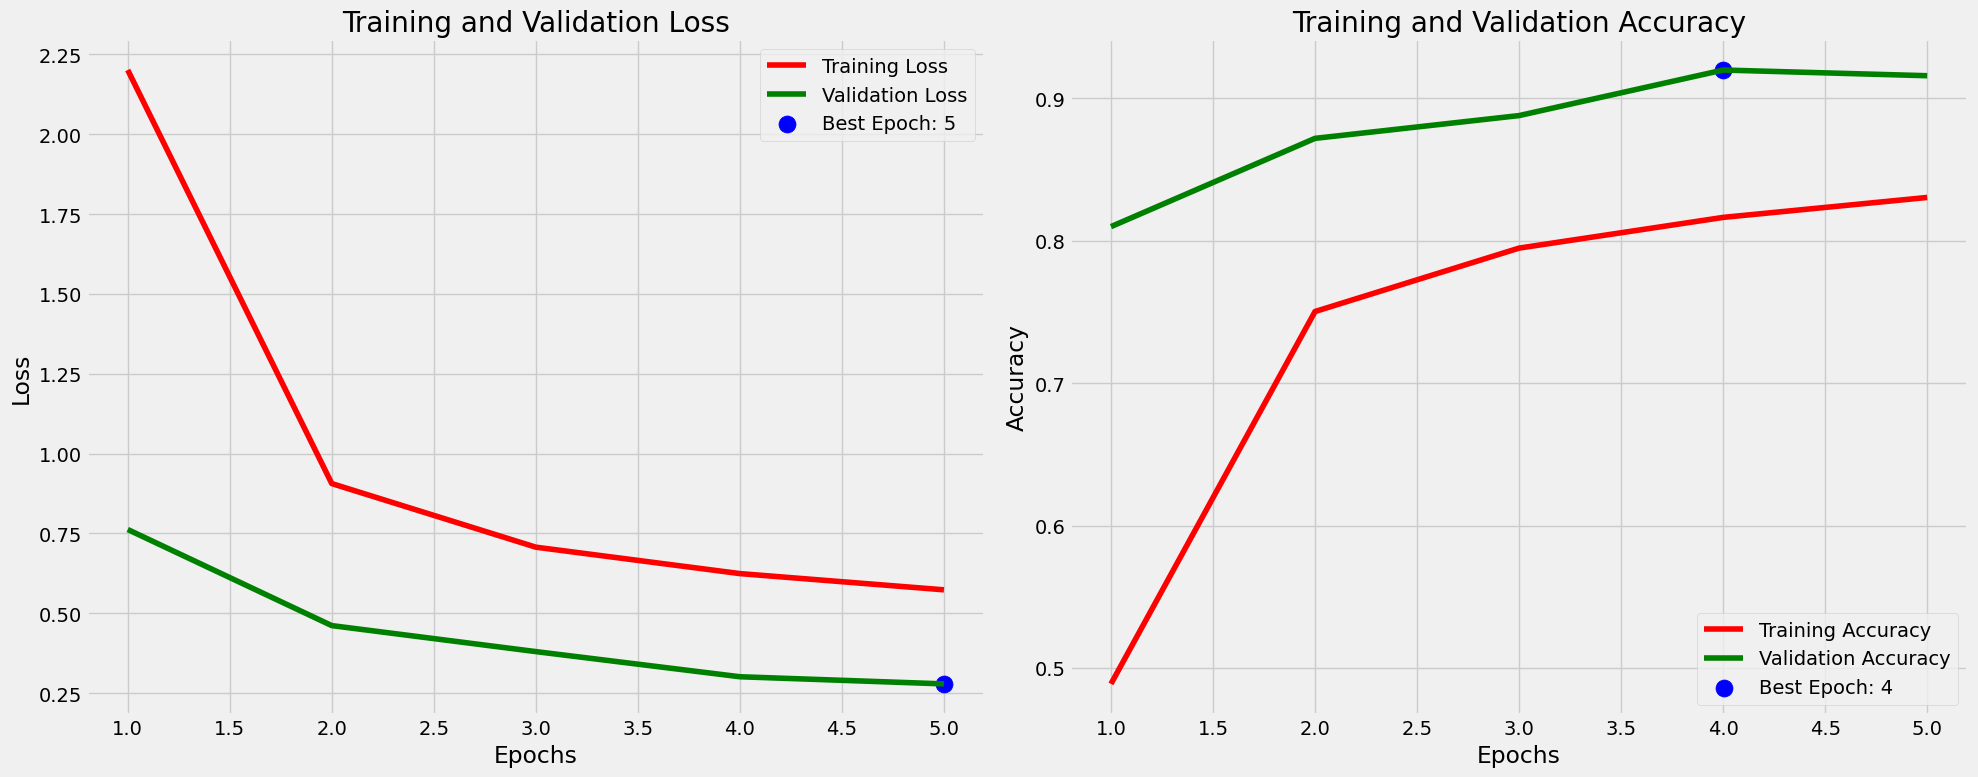

16/16 [==============================] - 1s 65ms/step - loss: 0.2789 - accuracy: 0.9160


[I 2024-01-21 23:09:17,074] Trial 1 finished with value: 0.9160000085830688 and parameters: {'dropout_rate': 0.3489731561517758, 'add_dense_layer': True, 'dense_units': 75}. Best is trial 0 with value: 0.9240000247955322.


Best Trial ID: 0
Best Trial Value: 0.9240000247955322
Best Trial Parameters: {'dropout_rate': 0.4999302098621021, 'add_dense_layer': True, 'dense_units': 149}
Best model saved as: best_model_trial_0_epoch_xx_val_acc_xxx.h5


In [11]:
# Define a function to create the neural network model
def create_model(trial):
    # Load EfficientNetB0 as the base model with pre-trained weights from ImageNet and exclude the top layer
    base_model = EfficientNetB0(
        weights="imagenet", include_top=False, input_shape=(224, 224, 3)
    )
    base_model.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(rate=trial.suggest_float("dropout_rate", 0.2, 0.5))(x)
    if trial.suggest_categorical("add_dense_layer", [True, False]):
        x = Dense(trial.suggest_int("dense_units", 64, 256), activation="relu")(x)
    predictions = Dense(train_generator.num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


# Define the objective function
def objective(trial):
    model = create_model(trial)

    # Set ModelCheckpoint
    checkpoint_filepath = "/kaggle/working/best_model_trial_{}_epoch_{{epoch:02d}}_val_acc_{{val_accuracy:.3f}}.h5".format(
        trial.number
    )
    checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor="val_accuracy",
        mode="max",
    )

    hist = model.fit(
        train_generator,
        epochs=5,
        validation_data=val_generator,
        callbacks=[checkpoint_callback],
    )
    plot_training(hist)
    eval_result = model.evaluate(val_generator)
    return eval_result[1]  # Return validation accuracy


# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2)

# Print and save the information of the best trial's model
best_trial = study.best_trial
print(f"Best Trial ID: {best_trial.number}")
print(f"Best Trial Value: {best_trial.value}")
print(f"Best Trial Parameters: {best_trial.params}")

# File name of the best model
best_model_filename = "best_model_trial_{}_epoch_xx_val_acc_xxx.h5".format(
    best_trial.number
)
print(f"Best model saved as: {best_model_filename}")

# Testing

1/1 [==============================] - 2s 2s/step


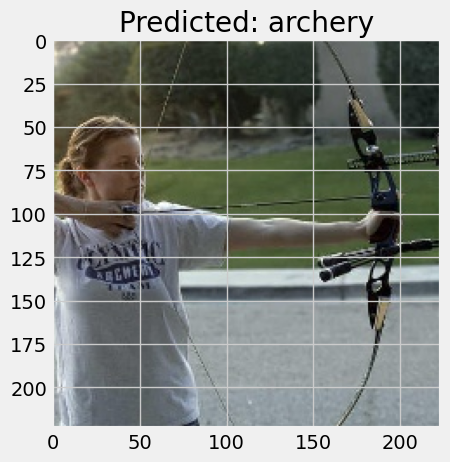

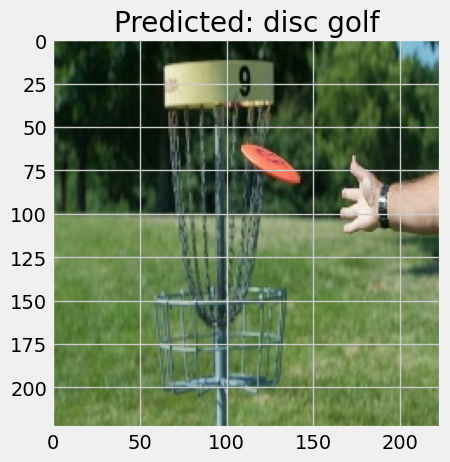

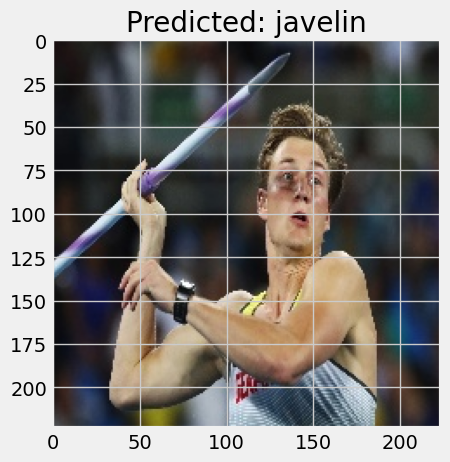

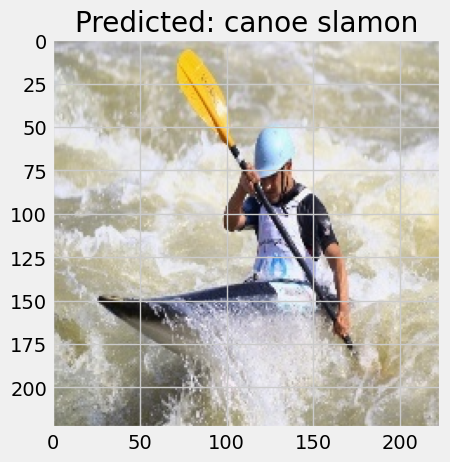

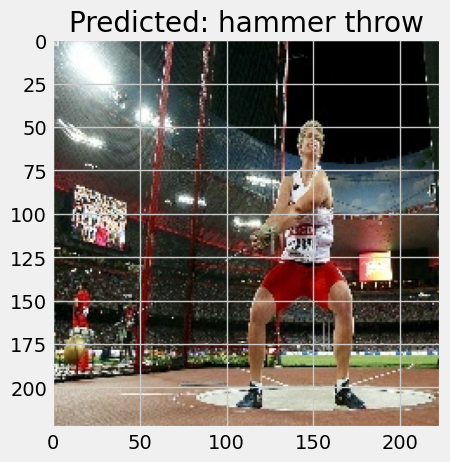

In [30]:
# Load the model
loaded_model = tf.keras.models.load_model(best_model_filename)

# Read images from the test folder
# Note: Assuming test_generator has been set up according to your code
test_images, test_labels = next(test_generator)

# Save the original images for display
original_images = test_images.copy()

# Make predictions
predictions = loaded_model.predict(test_images)

# Get the mapping between class indices and class names
class_indices = train_generator.class_indices
# Reverse the mapping to find class names from indices
index_to_class = {v: k for k, v in class_indices.items()}

# Select the number of images to show
num_images_to_show = 5

for i in range(num_images_to_show):
    # Get the index of the predicted class
    pred_index = np.argmax(predictions[i])
    # Find the corresponding class name based on the index
    pred_label = index_to_class[pred_index]

    # Display the original image
    plt.imshow(original_images[i].astype(np.uint8))
    plt.title(f"Predicted: {pred_label}")
    plt.show()

# Deployment prep.

# Convert Keras to TF-Lite


In [3]:
best_model_filename = (
    "/kaggle/input/best-model/best_model_trial_0_epoch_05_val_acc_0.944.h5"
)
# Load the Keras model
model = tf.keras.models.load_model(best_model_filename)

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

In [24]:
!wget https://i.ibb.co/mJYVSfB/3.jpg -O 3.jpg

--2024-01-22 00:30:10--  https://i.ibb.co/mJYVSfB/3.jpg
Resolving i.ibb.co (i.ibb.co)... 162.19.58.157, 162.19.58.158, 162.19.58.161, ...
Connecting to i.ibb.co (i.ibb.co)|162.19.58.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26123 (26K) [image/jpeg]
Saving to: '3.jpg'

3.jpg               100%[===================>]  25.51K  --.-KB/s    in 0.01s   

2024-01-22 00:30:10 (1.94 MB/s) - '3.jpg' saved [26123/26123]



In [29]:
from tensorflow.keras.preprocessing.image import load_img

img = load_img("3.jpg", target_size=(224, 224))
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)
preds = model.predict(X)
preds

1/1 [==============================] - 0s 28ms/step


array([[4.14287797e-06, 2.65908529e-05, 3.62071228e-06, 2.05058939e-08,
        6.24837703e-05, 4.81515769e-08, 7.87655426e-06, 1.02215886e-01,
        1.97836687e-03, 2.67722658e-06, 3.66643121e-07, 1.35841329e-08,
        7.52165079e-07, 6.18709976e-07, 3.70071357e-05, 5.18330580e-06,
        3.04185915e-06, 2.86947125e-06, 2.69786767e-07, 1.88165325e-06,
        2.31072249e-07, 4.89323260e-03, 3.34615970e-06, 1.62226370e-05,
        2.99006047e-07, 2.59755254e-01, 1.47608171e-06, 2.30840978e-05,
        2.20144531e-04, 7.43581765e-08, 1.64942765e-06, 7.64021359e-04,
        2.41792755e-08, 8.21356753e-06, 8.92964817e-06, 1.42806380e-06,
        2.76492428e-05, 1.21056182e-05, 2.08030073e-08, 1.54521592e-06,
        4.00056706e-07, 4.06791922e-04, 9.19546551e-07, 1.43442173e-06,
        1.73267599e-05, 5.66936968e-08, 9.63812070e-08, 3.41697444e-07,
        4.33242917e-08, 2.19500922e-02, 9.25141762e-07, 3.74144338e-06,
        6.06701493e-01, 2.30551261e-04, 8.44449204e-08, 2.816440

In [53]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

# Removing TF dependency

In [93]:
def preprocess_input(x):
    # transform the pixels from [0, 255] to [-1, 1]
    #     x = x / 127.5
    #     x = x - 1.0
    return x

In [101]:
# replace load_img (check keras github repo)
from PIL import Image

with Image.open("/kaggle/input/test-pictures/2.jpg") as img:
    img = img.resize((224, 224), Image.NEAREST)

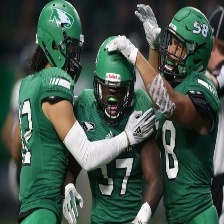

In [102]:
img

In [94]:
x = np.array(img, dtype="float32")
X = np.array([x])

X = preprocess_input(X)

In [96]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [107]:
class_indices = train_generator.class_indices
# Reverse the mapping between class indices and class names
index_to_class = {v: k for k, v in class_indices.items()}
data = dict(zip(index_to_class.values(), preds[0]))
max_key = max(data, key=data.get)

print(f"{max_key}', value:{data[max_key]}")

football', value:0.9215638637542725


In [100]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
  Obtaining dependency information for tflite_runtime from https://files.pythonhosted.org/packages/9e/1f/aade0d066bacbe697946ae21f0467a702d81adb939bb64515e9abebae9ed/tflite_runtime-2.14.0-cp310-cp310-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.1 MB/s eta 0:00:0000:0100:01


In [ ]:
import tflite_runtime.interpreter as tflite

interpreter = tflite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [103]:
from PIL import Image

with Image.open("/kaggle/input/test-pictures/2.jpg") as img:
    img = img.resize((224, 224), Image.NEAREST)
x = np.array(img, dtype="float32")
X = np.array([x])


def preprocess_input(x):
    # transform the pixels from [0, 255] to [-1, 1]
    #     x = x / 127.5
    #     x = x - 1.0
    return x


X = preprocess_input(X)

In [104]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

In [105]:
preds = interpreter.get_tensor(output_index)

In [115]:
classes = [
    "air hockey",
    "ampute football",
    "archery",
    "arm wrestling",
    "axe throwing",
    "balance beam",
    "barell racing",
    "baseball",
    "basketball",
    "baton twirling",
    "bike polo",
    "billiards",
    "bmx",
    "bobsled",
    "bowling",
    "boxing",
    "bull riding",
    "bungee jumping",
    "canoe slamon",
    "cheerleading",
    "chuckwagon racing",
    "cricket",
    "croquet",
    "curling",
    "disc golf",
    "fencing",
    "field hockey",
    "figure skating men",
    "figure skating pairs",
    "figure skating women",
    "fly fishing",
    "football",
    "formula 1 racing",
    "frisbee",
    "gaga",
    "giant slalom",
    "golf",
    "hammer throw",
    "hang gliding",
    "harness racing",
    "high jump",
    "hockey",
    "horse jumping",
    "horse racing",
    "horseshoe pitching",
    "hurdles",
    "hydroplane racing",
    "ice climbing",
    "ice yachting",
    "jai alai",
    "javelin",
    "jousting",
    "judo",
    "lacrosse",
    "log rolling",
    "luge",
    "motorcycle racing",
    "mushing",
    "nascar racing",
    "olympic wrestling",
    "parallel bar",
    "pole climbing",
    "pole dancing",
    "pole vault",
    "polo",
    "pommel horse",
    "rings",
    "rock climbing",
    "roller derby",
    "rollerblade racing",
    "rowing",
    "rugby",
    "sailboat racing",
    "shot put",
    "shuffleboard",
    "sidecar racing",
    "ski jumping",
    "sky surfing",
    "skydiving",
    "snow boarding",
    "snowmobile racing",
    "speed skating",
    "steer wrestling",
    "sumo wrestling",
    "surfing",
    "swimming",
    "table tennis",
    "tennis",
    "track bicycle",
    "trapeze",
    "tug of war",
    "ultimate",
    "uneven bars",
    "volleyball",
    "water cycling",
    "water polo",
    "weightlifting",
    "wheelchair basketball",
    "wheelchair racing",
    "wingsuit flying",
]
result = dict(zip(classes, preds[0]))

In [116]:
max_key = max(result, key=result.get)

print(f"{max_key}', value:{result[max_key]}")

football', value:0.9215638637542725
